## CPMP40370 Data Mining 2021/22: Practical 2 (Data Preprocessing)

In [16]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

import seaborn as sn
import matplotlib.pyplot as plt

### $\color{blue}{\text{Question 1}}$

In [17]:
#Reading the csv file into a pandas DataFrame.
dfq1 = pd.read_csv('./specs/Students_Results.csv')

In [18]:
#Considering nulls as ABS (Absences)
col = 'Homework 1'
print(col +': Min-%.0f, Max-%.0f, Mean-%.1f, Std-%.2f' % (dfq1[col].min(), dfq1[col].max(), dfq1[col].mean(), dfq1[col].std()))

col = 'Homework 2'
print(col +': Min-%.0f, Max-%.0f, Mean-%.1f, Std-%.2f' % (dfq1[col].min(), dfq1[col].max(), dfq1[col].mean(), dfq1[col].std()))

col = 'Homework 3'
print(col +': Min-%.0f, Max-%.0f, Mean-%.1f, Std-%.2f' % (dfq1[col].min(), dfq1[col].max(), dfq1[col].mean(), dfq1[col].std()))

col = 'Exam'
print(col +': Min-%.0f, Max-%.0f, Mean-%.1f, Std-%.2f' % (dfq1[col].min(), dfq1[col].max(), dfq1[col].mean(), dfq1[col].std()))

Homework 1: Min-31, Max-90, Mean-55.6, Std-17.88
Homework 2: Min-0, Max-98, Mean-89.8, Std-15.44
Homework 3: Min-5, Max-100, Mean-47.7, Std-21.59
Exam: Min-22, Max-98, Mean-65.2, Std-15.14


In [19]:
#Assuming absentees are given 0 marks for each assigment.
dfq1['Homework Avg'] = round(dfq1[['Homework 1', 'Homework 2', 'Homework 3']].sum(axis=1, min_count=1)/3.0, 1)

In [20]:
# Assuming if a student is absence for either all the Homeworks or the Exam, s/he will be given 'ABS'
dfq1['Exam'].fillna(0, inplace=True)
dfq1['Overall Mark'] = round(dfq1['Homework Avg']*0.25+dfq1['Exam']*0.75, 2)

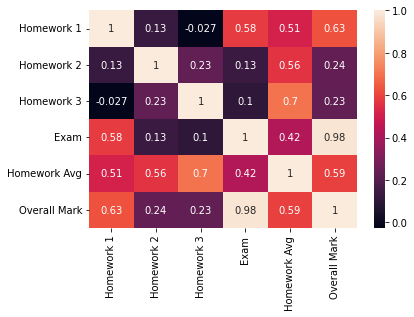

In [21]:
#Use pandas corr() function to get correlation matrix and use seaborn heatmap() to visualise.
corrMatrix = round(dfq1.drop(['Student ID'], axis=1).corr(), 3)
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [22]:
#Uisng UCD grading system you can use pandas apply() function with a user-defined function.
def gradingUCD(x):    
    if x >= 90:
        return 'A+'
    elif x >= 80:
        return 'A'
    elif x >= 70:
        return 'A-'
    elif x >= 66.67:
        return 'B+'
    elif x >= 63.33:
        return 'B'
    elif x >= 60:
        return 'B-'
    elif x >= 56.67:
        return 'C+'
    elif x >= 53.33:
        return 'C'
    elif x >= 50:
        return 'C-'
    elif x >= 46.67:
        return 'D+'
    elif x >= 43.33:
        return 'D'
    elif x >= 40:
        return 'D-'
    elif x >= 36.67:
        return 'E+'
    elif x >= 33.33:
        return 'E'
    elif x >= 30:
        return 'E-'
    elif x >= 26.67:
        return 'F+'
    elif x >= 23.33:
        return 'F'
    elif x >= 20:
        return 'F-'
    elif x >= 16.67:
        return 'G+'
    elif x >= 13.33:
        return 'G'
    elif x >= 0.01:
        return 'G-'
    else:
        return 'NM'
        
dfq1['Grade'] = dfq1['Overall Mark'].apply(gradingUCD)
#dfq1['Grade'].value_counts().sort_index()

In [23]:
#Instead of a user-defined function you can use lambda function.
#dfq1['Grade'] = dfq1['Overall Mark'].apply(lambda x: 'A+' if x>=90 else ('A' if x>=80 else ('A-' if x >=70 else 'B')))........

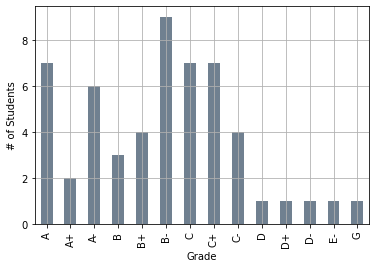

In [25]:
dft = dfq1[dfq1['Grade'] != 'ABS']
dft['Grade'].value_counts().sort_index().plot(kind='bar', color='slategray')
plt.xlabel('Grade')
plt.ylabel('# of Students')
plt.grid(True)
plt.show()

In [26]:
#Creating the output directory and writing the new dataframe into a csv file
os.mkdir('output')
dfq1.to_csv('output/question1_out.csv', index=False)

### $\color{blue}{\text{Question 2}}$

In [61]:
dfq2 = pd.read_csv('./specs/Sensor_Data.csv')

In [62]:
#Copying data columns into new columns.
dfq2['Original Input3'] = dfq2['Input3']
dfq2['Original Input12'] = dfq2['Input12']

In [63]:
# Use of sklearn StandardScaler() to get z-score values (Mean=0, Std=1)
dfq2['Input3'] = StandardScaler().fit_transform(dfq2[['Original Input3']].values)
dfq2['Input3'] = round(dfq2['Input3'], 3)
print(round(dfq2['Input3'].mean(), 2))
print(round(dfq2['Input3'].std(), 2))

-0.0
1.0


In [64]:
# Use of sklearn MinMaxScaler() to get normalised values (Min=0, Max=1)
dfq2['Input12'] = MinMaxScaler().fit_transform(dfq2[['Original Input12']].values)
dfq2['Input12'] = round(dfq2['Input12'], 3)
print(round(dfq2['Input12'].min(), 2))
print(round(dfq2['Input12'].max(), 2))

0.0
1.0


In [65]:
#Creating a new clumn with average of a set of selected columns
dfq2['Average Input'] = dfq2[['Input1', 'Input2', 'Input3', 'Input4', 'Input5', 'Input6', 'Input7', 'Input8', 'Input9', 'Input10', 'Input11', 'Input12']].mean(axis=1)

In [66]:
dfq2.to_csv('output/question2_out.csv', index=False)

### $\color{blue}{\text{Question 3}}$

In [67]:
dfq3 = pd.read_csv('./specs/DNA_Data.csv')

In [68]:
# Use of sklearn PCA with 95% varianace explained
pca = PCA(0.95)
principalComponents = pca.fit_transform(dfq3)
print("Number of PCs %d" % pca.n_components_)
#pca.explained_variance_ratio_

Number of PCs 22


In [69]:
# Use of cut() function to categorise data into 10 equal length groups
labels = ['Group0', 'Group1', 'Group2', 'Group3', 'Group4', 'Group5', 'Group6', 'Group7', 'Group8', 'Group9']

for i in range(0, 22):
    label = 'pca'+str(i+1)+'_width'
    dfq3[label] = pd.cut(principalComponents[:,i], bins=10, labels=labels)

In [70]:
# Use of qcut() function to categorise data into 10 equal count (quantile) groups
for i in range(0, 22):
    label = 'pca'+str(i+1)+'_freq'
    dfq3[label] = pd.qcut(principalComponents[:,i], q=10, labels=labels)

In [71]:
dfq3.to_csv('output/question3_out.csv', index=False)